# Explore here

In [1]:
import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

# Load the dataset into a pandas DataFrame
sales_df = pd.read_csv(url)

# Display the first few rows of the DataFrame to verify that it's loaded correctly
print(sales_df.head())


                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


In [2]:
# Convert the 'date' column to datetime format and set it as the index
sales_df['date'] = pd.to_datetime(sales_df['date'])
sales_df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame to verify the changes
print(sales_df.head())

                                sales
date                                 
2022-09-03 17:10:08.079328  55.292157
2022-09-04 17:10:08.079328  53.803211
2022-09-05 17:10:08.079328  58.141693
2022-09-06 17:10:08.079328  64.530899
2022-09-07 17:10:08.079328  66.013633


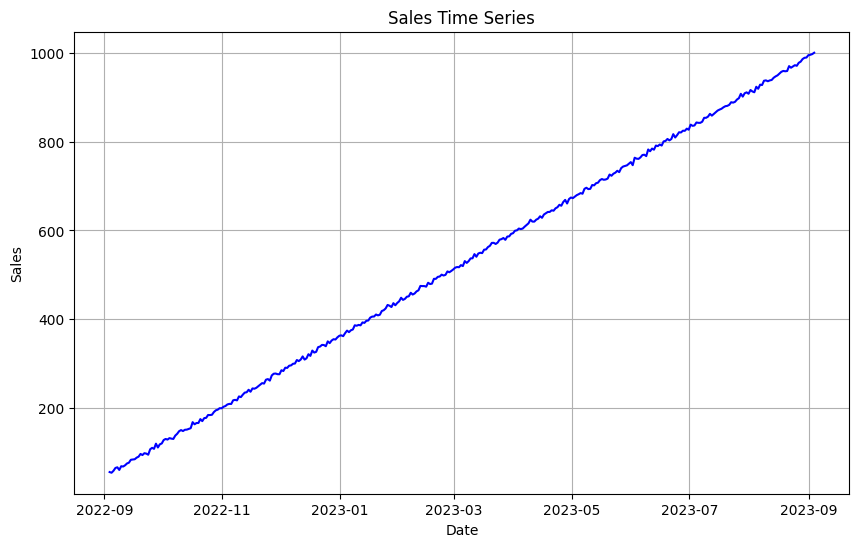

In [3]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(sales_df.index, sales_df['sales'], color='blue')
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [7]:
#Which is the tensor of the time serie? - daily, one day
#Which is the trend? - upward trend

#Is it stationary?

from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(sales_df['sales'])

# Extracting test statistics and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0). The time series is non-stationary.")


ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063
Fail to reject the null hypothesis (H0). The time series is non-stationary.


In [9]:
import numpy as np

# Descriptive Statistics: Calculate standard deviation
std_deviation = np.std(sales_df['sales'])
print("Standard Deviation:", std_deviation)

Standard Deviation: 274.71363537048717


In [ ]:
#Yes to noise based on visual inspection and SD

In [17]:
from pmdarima import auto_arima

model = auto_arima(sales_df, seasonal = False, trace = True, m = 7)





/home/vscode/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.192 seconds


In [18]:
forecast = model.predict(20)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831669
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217254
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206409
2023-09-15 17:10:08.079328    1030.804240
2023-09-16 17:10:08.079328    1033.402071
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
Freq: D, dtype: float64

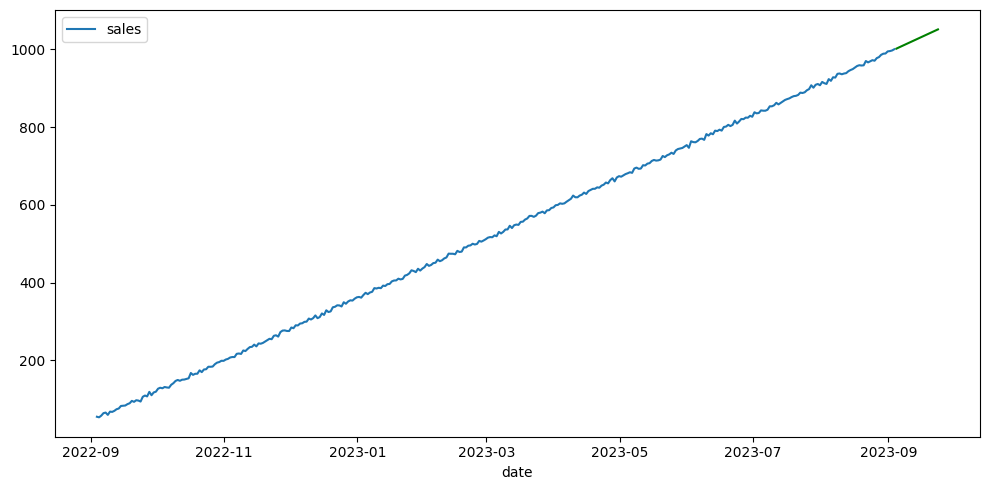

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales_df)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1675.428, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1578.564, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1475.165, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1763.761, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1475.512, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1475.495, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1479.028, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1762.924, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.321 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -734.582
Date:                Tue, 09 Apr 2024   AIC           

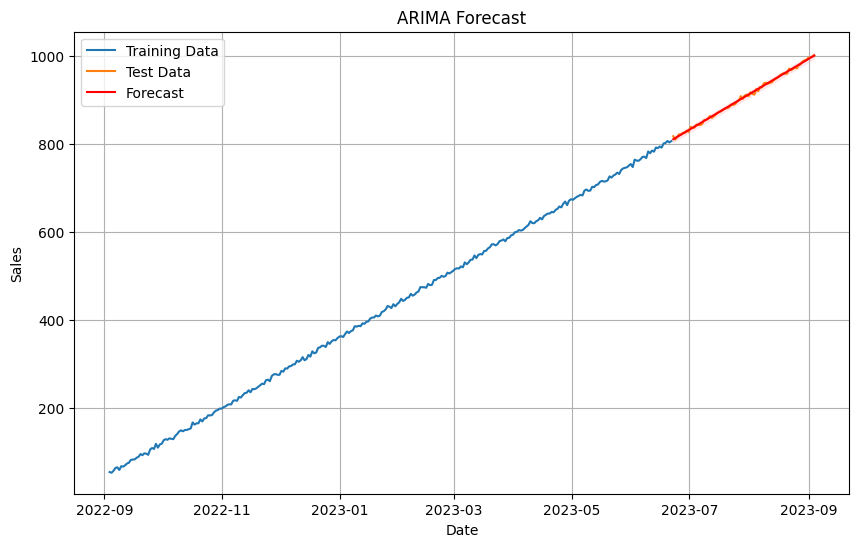

In [22]:
#now checking out an alternative approach

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
sales_df = pd.read_csv(url)
sales_df['date'] = pd.to_datetime(sales_df['date'])
sales_df.set_index('date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(sales_df) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = sales_df.iloc[:train_size], sales_df.iloc[train_size:]

# Use auto_arima to find the best ARIMA model
model = auto_arima(train_data, seasonal=False, trace=True)

# Print the summary of the best model
print(model.summary())

# Forecast using the best model
n_periods = len(test_data)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the forecast and actual data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
